## Opencv Kmeans

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('./img/table tennis.jpg')
#img = cv.imread('./img/bikini-beach.jpg')
#img = cv.imread('./img/flower.jpg')
#img = cv.imread('./img/lego.jpg')
#img = cv.imread('./img/MRI.jpg')
img = cv.imread('./img/nuk.bmp')
#print(img)


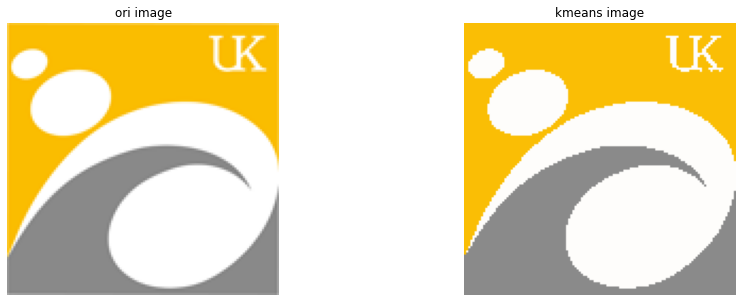

In [3]:
kmeans_data = img.reshape((-1,3))
#print("------------------------")
#print(Z)


# 做 Kmeas前必須先將轉換成float32的形態
kmeans_data = np.float32(kmeans_data)



# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#criteria = (cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#criteria:表示迭代終止的條件，如果為CV_TERMCRIT_ITER，則用最大迭代次數作為終止條件，如果為CV_TERMCRIT_EPS 則用精度作為迭代條件，
#如果為CV_TERMCRIT_ITER+CV_TERMCRIT_EPS(本範例所使用)則用最大迭代次數或者精度作為迭代條件，看哪個條件先滿足。
#後面的兩個參數分別代表跌代次數與最小精度


K = 3
#K:代表分幾群

flags=cv.KMEANS_RANDOM_CENTERS
#flags:用來決定初始值(這個範例以cv.KMEANS_RANDOM_CENTERS)
#也可以使用cv.KMEANS_PP_CENTERS當作初始值，這種方法會更審慎的選擇群聚中心的起始點，
#且通常可用更少的跌代次數產生比預設方法更好的結果。


ret,label,center=cv.kmeans(kmeans_data,K,None,criteria,10,flags)
#ret,label,center=cv.kmeans(kmeans_data,K,None,criteria,attempts,flags)
#output parameter
#ret:代表每個點到其相應中心的距離平方和
#label:代表每個點的標籤
#center:表示每個點屬於的中心點

#input parameter
#kemeans_data:輸入的 kemas的資料
#K:代表分幾群
#criteria:決定終止參數
#attempts:告知 cv.kmeans自動執行某個次數，每一次都是用一組新的種子點開始，並保留最佳結果
#flags:決定初始值的方式



# 做 Kmeas後須將結果轉換成 uint8的這樣才可以把圖 show出來
center = np.uint8(center)
res = center[label.flatten()]

res2 = res.reshape((img.shape))


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('ori image')
plt.axis('off')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('kmeans image')
plt.axis('off')
plt.imshow(cv.cvtColor(res2,cv.COLOR_BGR2RGB))

plt.show()